# 연체가능성 예측

In [5]:
practice_df['신용등급'].fillna(practice_df['신용등급'].mean(), inplace=True)
print('데이터 세트 Null 값 개수', practice_df.isnull().sum().sum())

데이터 세트 Null 값 개수 168426


In [7]:
practice_df.drop(['상품세분류명'], axis='columns', inplace=True)

In [8]:
# 로딩된 데이터 칼럼 타입 확인
print('\n ### 학습 데이터 정보 ### \n')
print(practice_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16518 entries, 0 to 16517
Columns: 105 entries, 지점코드 to 기한이익상실여부01
dtypes: float64(11), int64(22), object(72)
memory usage: 13.2+ MB
None


In [10]:
practice_df.groupby(['원금연체회차','이자연체회차', '기한이익상실여부'])['기한이익상실여부'].count()

원금연체회차  이자연체회차  기한이익상실여부
0       0       N           15164
                Y              20
        1       N             154
                Y               6
        2       N               6
                Y              58
        3       N               1
                Y              74
        4       Y              45
        5       Y              60
        6       Y              38
        7       Y              40
        8       Y              35
        9       Y              38
        10      Y              36
        11      Y              49
        12      Y              55
        13      Y              26
        14      Y              39
        15      Y               5
        16      Y               6
        17      Y               3
        18      Y               1
        19      Y               3
        20      Y               2
        22      Y               2
        27      Y               2
1       0       Y               8
        1       N      

In [11]:
practice_df.groupby(['이자연체회차', '기한이익상실여부'])['기한이익상실여부'].count()

이자연체회차  기한이익상실여부
0       N           15164
        Y              41
1       N             239
        Y              24
2       N               6
        Y              94
3       N               1
        Y             107
4       Y              75
5       Y              89
6       Y              77
7       Y              79
8       Y              67
9       Y              68
10      Y              61
11      Y              85
12      Y             103
13      Y              49
14      Y              44
15      Y              10
16      Y              11
17      Y               5
18      Y               1
19      Y               5
20      Y               3
21      Y               1
22      Y               2
23      Y               1
25      Y               2
27      Y               3
45      Y               1
Name: 기한이익상실여부, dtype: int64

In [12]:
practice_df.groupby(['성별구분','기한이익상실여부01'])['기한이익상실여부01'].count()
# 기한이익상실여부의 0이 N, 1이 Y

성별구분  기한이익상실여부01
남성    0             7812
      1              584
여성    0             7598
      1              524
Name: 기한이익상실여부01, dtype: int64

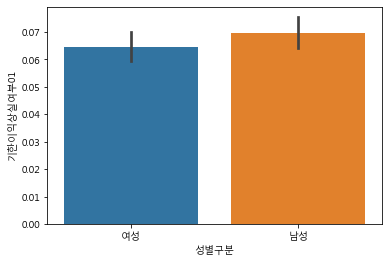

In [13]:
sns.barplot(x='성별구분', y = '기한이익상실여부01', data=practice_df)

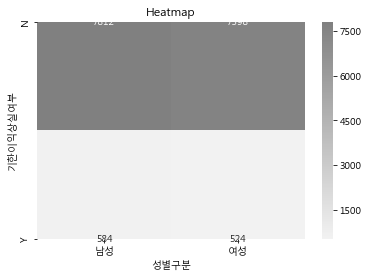

In [14]:
# Seaborn그리기. X 축에 'Sex'칼럼, Y 축에 'Survived' 칼럼, 데이터로 DataFrame 객체명 입력
practice_df_size = practice_df.pivot_table(
    index='기한이익상실여부', columns='성별구분', aggfunc='size')
practice_df_size

sns.heatmap(practice_df_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

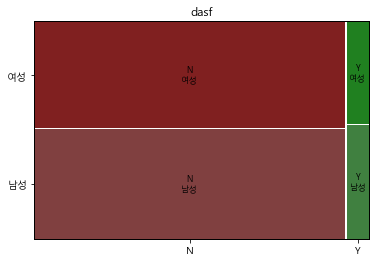

In [15]:
mosaic(practice_df.sort_values('성별구분'),['기한이익상실여부', '성별구분'],
      title='dasf')
plt.show()

In [16]:
# 칼럼을 다른 칼럼으로 생성복사
#practice_df['기한이익상실여부01']=practice_df['기한이익상실여부'].apply(lambda x: x)

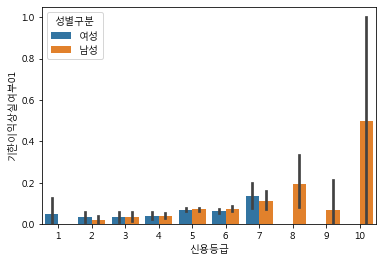

In [17]:
practice_df.groupby(['신용등급', '성별구분', '기한이익상실여부01'])['기한이익상실여부01'].count()
sns.barplot(x='신용등급',y='기한이익상실여부01',hue='성별구분', data=practice_df)

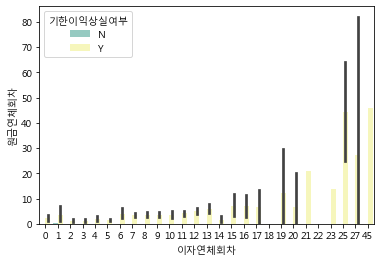

In [18]:
practice_df.groupby(['이자연체회차', '원금연체회차', '기한이익상실여부01'])['기한이익상실여부01'].count()
sns.barplot(x='이자연체회차',y='원금연체회차',hue='기한이익상실여부', data=practice_df, palette='Set3')

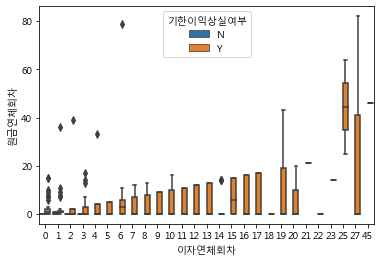

In [19]:
practice_df.groupby(['이자연체회차', '원금연체회차', '기한이익상실여부01'])['기한이익상실여부01'].count()
sns.boxplot(x='이자연체회차',y='원금연체회차',hue='기한이익상실여부', data=practice_df)
plt.show()

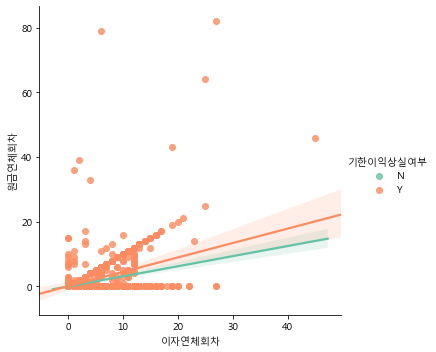

In [20]:
practice_df.groupby(['이자연체회차', '원금연체회차', '기한이익상실여부01'])['기한이익상실여부01'].count()
sns.lmplot(x='이자연체회차',y='원금연체회차',hue='기한이익상실여부', data=practice_df, palette='Set2')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


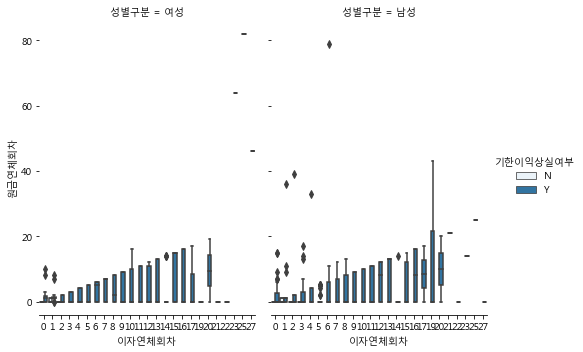

In [21]:
g=sns.FacetGrid(practice_df, col="성별구분", size=5, aspect=.7)
(g.map(sns.boxplot, "이자연체회차", "원금연체회차", "기한이익상실여부").despine(left=True).add_legend(title="기한이익상실여부"))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


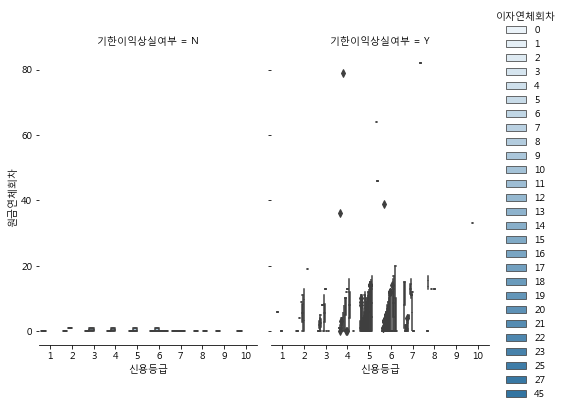

In [22]:
g=sns.FacetGrid(practice_df, col="기한이익상실여부", size=5, aspect=.7)
(g.map(sns.boxplot, "신용등급", "원금연체회차", "이자연체회차").despine(left=True).add_legend(title="이자연체회차"))
plt.show()

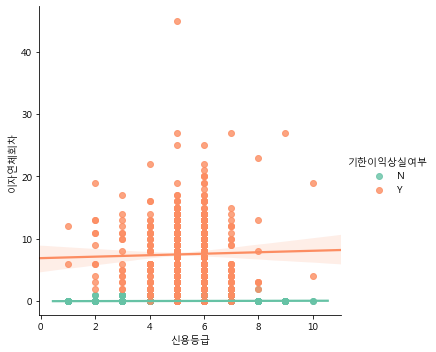

In [23]:
sns.lmplot(x='신용등급',y='이자연체회차',hue='기한이익상실여부', data=practice_df, palette='Set2')

In [24]:
practice_df.groupby(['상품명','기한이익상실여부01'])['기한이익상실여부01'].count()
# 기한이익상실여부의 0이 N, 1이 Y

상품명        기한이익상실여부01
e-예적금담보대출  0                15
가계종합통장대출   0                46
           1                 2
소비자금융      0                13
           1                 8
소액신용대출1    0             12061
           1              1020
소액신용대출2    0              2578
           1                 4
예적금담보대출    0                18
일반자금대출     0               679
           1                73
햇살론        1                 1
Name: 기한이익상실여부01, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


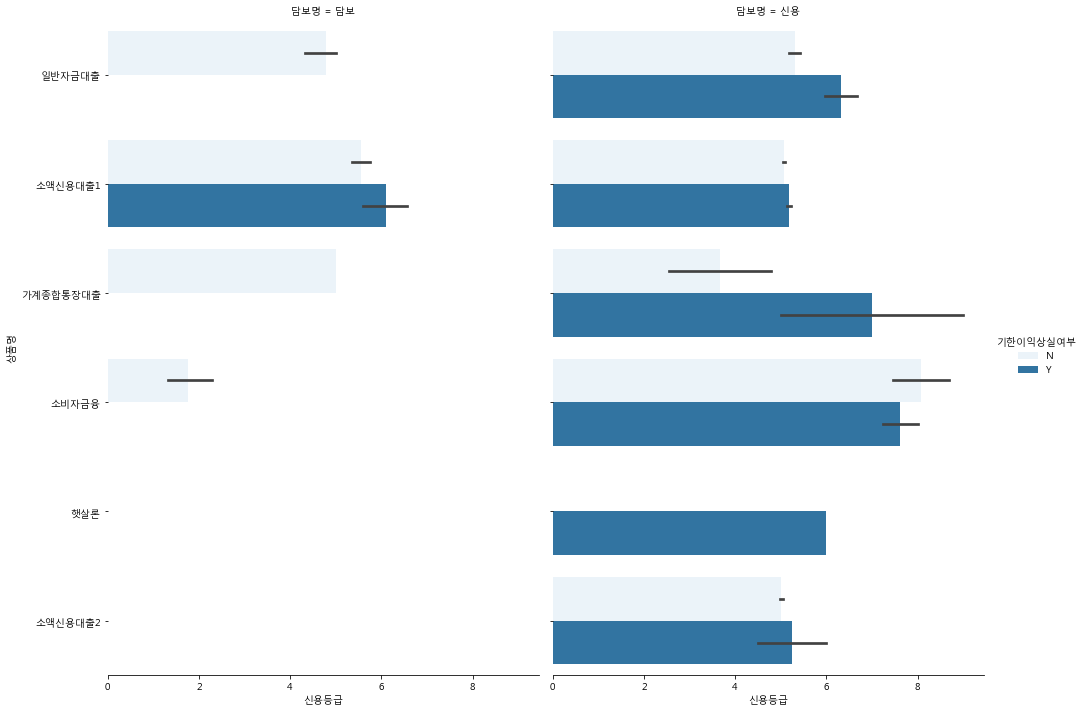

In [25]:
h = sns.FacetGrid(practice_df, col='담보명', size=10, aspect=.7)
(h.map(sns.barplot, '신용등급', '상품명', '기한이익상실여부').despine(left=True).add_legend(title="기한이익상실여부"))
plt.show()

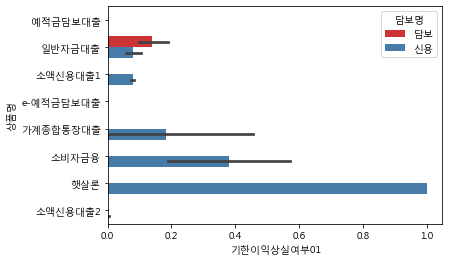

In [27]:
sns.barplot(x='기한이익상실여부01',y='상품명', hue='담보명', data=practice_df, palette='Set1')

practice = practice_df.pivot("신용등급", "상품명", "이자연체회차")
practice.head(5)

pivot1=practice_df.groupby(['상품명','신용등급','기한이익상실여부01'])['기한이익상실여부01'].count()
pivot1

plt.figure(figsize=(20,20))
sns.heatmap(pivot1)
plt.show()

sns.pairplot(iris, vars=['신용등급','상품명','기한이익상실여부01'])

from sklearn import preprocessing # 전처리
def encode_features(dataDF): # 여러 칼럼을 해당 함수를 새로 생성해 한 번에 변환함.
    features = ['상품명', '성별구분','다음원금납입일자']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

practice_df = encode_features(practice_df)
practice_df.tail(10)

In [30]:
practice_df.groupby(['성별구분','다음원금납입일자',])['성별구분'].count()

성별구분  다음원금납입일자
남성    20121223    1
      20151231    1
      20160522    1
      20160721    1
      20161018    1
                 ..
여성    20240624    4
      20240625    4
      20240626    4
      20240627    3
      20240628    7
Name: 성별구분, Length: 2738, dtype: int64

# 데이터 전처리 수행 함수 제작 후 원본데이터 가공

# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
practice_df3 = pd.read_csv('./practice.csv')
y_practice_df3 = practice_df3['기한이익상실여부']   # 레이블 데이터 세트
X_practice_df3 = practice_df3.drop('기한이익상실여부', axis=1)

practice_df3.dtypes


from sklearn import preprocessing # 전처리
def encode_features(dataDF): # 여러 칼럼을 해당 함수를 새로 생성해 한 번에 변환함.
    features = ['과목명','상품명', '성별구분','생일/사업자','담보명','상환방법','자금용도구분코드','보정이자구분','기한이익상실여부']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

X_practice_df3 = encode_features(practice_df3)
X_practice_df3.head()


X_practice_df3.head()

# 아래부터 시작아래부터 시작아래부터 시작
# 아래부터 시작아래부터 시작아래부터 시작
# 아래부터 시작아래부터 시작아래부터 시작
# 아래부터 시작아래부터 시작아래부터 시작
# 아래부터 시작아래부터 시작아래부터 시작
# 아래부터 시작아래부터 시작아래부터 시작
# 아래부터 시작아래부터 시작아래부터 시작

In [85]:
#########################################################################################################
from sklearn import preprocessing

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['담보명',  '연체료'], axis=1, inplace=True)
    return df


def format_features(df): # 여러 칼럼을 해당 함수를 새로 생성해 한 번에 변환함.
    features = ['과목명', '상품명', '성별구분','상환방법', '상품분류', '실행금액', '대출잔액','정상이자']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# 앞에서 설정한 데이터전처리 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df

#########################################################################################################

In [86]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
practice_df = pd.read_csv('./practice.csv')
y_practice_df = practice_df['기한이익상실여부01']   # 레이블 데이터 세트
X_practice_df = practice_df.drop('기한이익상실여부01', axis=1)

X_practice_df = transform_features(X_practice_df) # 피처 데이터 세트. 위의 전처리 함수 사용으로 필요한 데이터만 추출

In [87]:
X_practice_df.dtypes

과목명         int32
상품명         int32
성별구분        int32
나이          int64
계약기간월       int64
정상이율      float64
상환방법        int32
이자진행회차      int64
이자연체회차      int64
원금연체회차      int64
상품분류        int32
실행금액        int32
대출잔액        int32
연체이율      float64
정상이자        int32
신용등급        int64
dtype: object

In [88]:
X_practice_df.head()

,과목명,상품명,성별구분,나이,계약기간월,정상이율,상환방법,이자진행회차,이자연체회차,원금연체회차,상품분류,실행금액,대출잔액,연체이율,정상이자,신용등급
0,0,5,1,66,7,4.65,2,2,0,0,7,407,5513,4.65,1864,5
1,1,6,0,46,12,12.00,2,12,0,0,6,448,6161,15.00,4680,5
2,1,6,0,46,12,8.60,2,12,0,0,6,485,7357,11.60,4757,5
3,1,6,1,42,24,8.60,2,28,5,4,6,222,2484,11.60,2423,7
4,1,6,1,42,24,11.00,2,28,5,4,6,458,6651,14.00,34,7


In [89]:
###################### 여기까지 전처리 종료 #####################
###################### 여기까지 전처리 종료 #####################
###################### 여기까지 전처리 종료 #####################
###################### 여기까지 전처리 종료 #####################
###################### 여기까지 전처리 종료 #####################
###################### 여기까지 전처리 종료 #####################
###################### 여기까지 전처리 종료 #####################

## train_test_split() API를 이용해 별도의 테스트 데이터 세트 추출 20%로.

In [90]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_practice_df, y_practice_df, test_size=0.2, random_state=13, stratify=y_practice_df) # test 데이터가 20%
X_train, X_test, y_train, y_test = train_test_split(X_practice_df, y_practice_df, test_size=0.2, random_state=13)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=13)
rf_clf = RandomForestClassifier(random_state=13)
lr_clf = LogisticRegression()


# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.9967
RandomForestClassifier 정확도: 0.9973


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 정확도: 0.9936


# 위의 것들 중 로지스틱 회귀만 기준으로 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 스코어 구함

## 기한이익상실여부01의 0/1 개수 우선 계산..

In [93]:
# 앞서 구현한 get_clf_eval() 함수에 ROC AUC 값을 구하는 로직을 추가해 임곗값 변화시키며 평가지표 구함.


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, lr_pred)   # 오차행렬
    accuracy = accuracy_score(y_test,lr_pred)  # 정확도
    precision = precision_score(y_test,lr_pred) # 정밀도
    recall = recall_score(y_test,lr_pred) # 재현율
    f1 = f1_score(y_test, lr_pred)    # F1 스코어 추가
    roc_score = roc_auc_score(y_test, lr_pred)  # ROC AUC 값 추가
    print('오차 행렬')
    print(confusion)
    # 모든 Score 출력
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    
    
# 로지스틱 회귀 학습/예측/평가
# lr_clf.fit(X_train, y_train)
# lr_pred = lr_clf.predict(X_test)
# print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
    
#thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]
#pred_proba = lr_clf.predict_proba(X_test)  # 피쳐들의 예측값
#get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

In [94]:
# 위의 것들 중 로지스틱 회귀만 기준으로 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 스코어 구함
get_clf_eval(y_test, lr_pred)

오차 행렬
[[3066    2]
 [  19  217]]
정확도: 0.9936, 정밀도: 0.9909, 재현율: 0.9195, F1: 0.9538, ROC AUC: 0.9594


# 지표 값 조정에 앞서서 데이터 값을 점검 (피쳐 값 분포도로 살펴본다)

In [95]:
X_practice_df.describe()

,과목명,상품명,성별구분,나이,계약기간월,정상이율,상환방법,이자진행회차,이자연체회차,원금연체회차,상품분류,실행금액,대출잔액,연체이율,정상이자,신용등급
count,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000
mean,1.000908,3.285507,0.491706,26.855854,53.472212,23.826376,1.702688,26.702627,0.519252,0.233019,3.307725,321.290834,4038.731868,25.350986,3951.003451,5.080034
std,0.070023,0.714816,0.499946,6.543430,13.931541,4.404357,0.457221,15.220013,2.233662,1.852595,0.761378,159.118052,2276.784621,3.861908,2737.786786,0.947051
min,0.000000,0.000000,0.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,0.000000,1.000000
25%,1.000000,3.000000,0.000000,23.000000,60.000000,19.900000,1.000000,18.000000,0.000000,0.000000,3.000000,195.250000,1883.250000,22.900000,1457.250000,5.000000
50%,1.000000,3.000000,0.000000,25.000000,60.000000,24.000000,2.000000,26.000000,0.000000,0.000000,3.000000,430.000000,4348.000000,27.000000,3901.500000,5.000000
75%,1.000000,3.000000,1.000000,28.000000,60.000000,27.600000,2.000000,38.000000,0.000000,0.000000,3.000000,430.000000,5699.750000,27.900000,6444.750000,6.000000
max,2.000000,7.000000,1.000000,89.000000,120.000000,29.000000,2.000000,115.000000,45.000000,82.000000,11.000000,511.000000,7822.000000,32.000000,8488.000000,10.000000


# 정밀도와 재현율을 시각화, ROC AUC도 시각화

pred_proba = lr_clf.predict_proba(X_test) # 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()로 예측 확률 확인과, 
                                          # Binarizer로 임곗값 조정
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

from sklearn.preprocessing import Binarizer

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0,10, 0,15, 0.3, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):   # pred_proba_c1 새로이 추가
    # thresholds list객체 내의 값을 차례로 iteration(반복)하면서 Evauation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)  # fit으로 x_test 값에 해당하는 pred_proba_c1 사용
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)   # 값 반환.

In [105]:
# 정밀도와 재현율 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1 )
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') # 정밀도는 점선으로 표시
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
#precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:,1])  # [:,1] 는 index 범위 지정

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


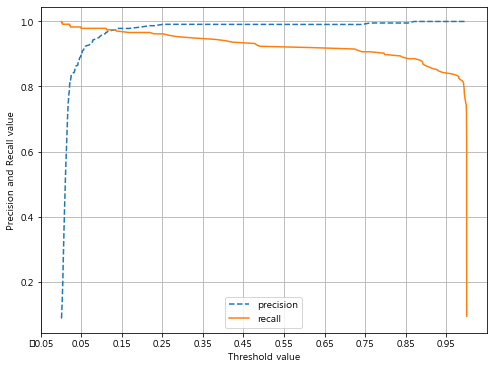

In [109]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, -1]
# print(pred_proba_c1)

precision_recall_curve_plot(y_test, pred_proba_c1)

In [110]:
# 피처 Data셋, 레이블 Data셋 다시 추출
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
X = practice_df.iloc[:, :-1] # 맨 뒤 칼럼 제외 전부 추출 (피처데이터세트)
y = practice_df.iloc[:, -1] # 맨 끝이 사용 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해  사용칼럼의 값만 추출 (피처데이터세트)

In [119]:
print(y)

0        0
1        0
2        0
3        1
4        1
        ..
16513    0
16514    0
16515    0
16516    0
16517    0
Name: 기한이익상실여부01, Length: 16518, dtype: int64


In [120]:
#########################################################################################################
from sklearn import preprocessing

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['담보명', '연체료'], axis=1, inplace=True)
    return df


def format_features(df): # 여러 칼럼을 해당 함수를 새로 생성해 한 번에 변환함.
    features = ['과목명', '상품명', '성별구분','상환방법', '상품분류', '실행금액', '대출잔액','정상이자']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# 앞에서 설정한 데이터전처리 함수 호출
def transform_features(df):
    df = drop_features(df)
    df = format_features(df)
    return df

In [122]:
print(practice_df_again)
print(practice_df_again.info())

       과목명  상품명  성별구분  나이  계약기간월   정상이율  상환방법  이자진행회차  이자연체회차  원금연체회차  상품분류  \
0        0    5     1  66      7   4.65     2       2       0       0     7   
1        1    6     0  46     12  12.00     2      12       0       0     6   
2        1    6     0  46     12   8.60     2      12       0       0     6   
3        1    6     1  42     24   8.60     2      28       5       4     6   
4        1    6     1  42     24  11.00     2      28       5       4     6   
...    ...  ...   ...  ..    ...    ...   ...     ...     ...     ...   ...   
16513    1    4     0  22     60  19.40     2       1       0       0     4   
16514    1    4     0  22     12  19.40     2       1       0       0     4   
16515    1    4     1  24     60  18.90     2       1       0       0     4   
16516    1    4     0  26     60  19.80     2       1       0       0     4   
16517    1    4     1  22     60  19.80     2       1       0       0     4   

       실행금액  대출잔액   연체이율  정상이자  신용등급  
0       407 

In [123]:
# stratify=y 있음

X_train, X_test, y_train, y_test = train_test_split(practice_df_again, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[2879  203]
 [ 206   16]]
정확도: 0.8762, 정밀도: 0.0731, 재현율: 0.0721, F1: 0.0726, ROC AUC: 0.5031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
# stratify=y 없음

X_train, X_test, y_train, y_test = train_test_split(practice_df_again, y, test_size = 0.2, random_state = 156)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[2867  203]
 [ 218   16]]
정확도: 0.8726, 정밀도: 0.0731, 재현율: 0.0684, F1: 0.0706, ROC AUC: 0.5011


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [125]:
# 정밀도와 재현율 시각화2

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1 )
    
    # X축을 threshold 값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행.
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') # 정밀도는 점선으로 표시
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
#precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:,1])  # [:,1] 는 index 범위 지정

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


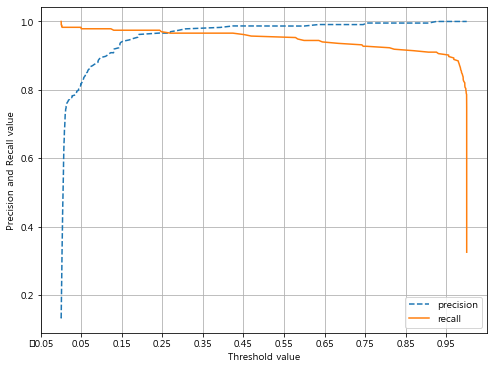

In [126]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, -1]
# print(pred_proba_c1)

precision_recall_curve_plot(y_test, pred_proba_c1)

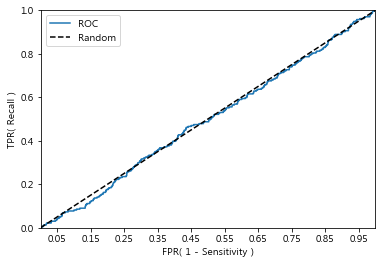

In [127]:
# FPR, TPR 임곗값 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [129]:
practice_df_again.describe()

,과목명,상품명,성별구분,나이,계약기간월,정상이율,상환방법,이자진행회차,이자연체회차,원금연체회차,상품분류,실행금액,대출잔액,연체이율,정상이자,신용등급
count,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000
mean,1.000908,3.285507,0.491706,26.855854,53.472212,23.826376,1.702688,26.702627,0.519252,0.233019,3.307725,321.290834,4038.731868,25.350986,3951.003451,5.080034
std,0.070023,0.714816,0.499946,6.543430,13.931541,4.404357,0.457221,15.220013,2.233662,1.852595,0.761378,159.118052,2276.784621,3.861908,2737.786786,0.947051
min,0.000000,0.000000,0.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,0.000000,1.000000
25%,1.000000,3.000000,0.000000,23.000000,60.000000,19.900000,1.000000,18.000000,0.000000,0.000000,3.000000,195.250000,1883.250000,22.900000,1457.250000,5.000000
50%,1.000000,3.000000,0.000000,25.000000,60.000000,24.000000,2.000000,26.000000,0.000000,0.000000,3.000000,430.000000,4348.000000,27.000000,3901.500000,5.000000
75%,1.000000,3.000000,1.000000,28.000000,60.000000,27.600000,2.000000,38.000000,0.000000,0.000000,3.000000,430.000000,5699.750000,27.900000,6444.750000,6.000000
max,2.000000,7.000000,1.000000,89.000000,120.000000,29.000000,2.000000,115.000000,45.000000,82.000000,11.000000,511.000000,7822.000000,32.000000,8488.000000,10.000000


# 위 값을 보면 min 값이 0으로 돼 있는 피처가 상당히 많음. 
    -> 예를들어, 계약기간월 min 값이 0인 것은 말이 되지 않는다. 
    
### 히스토그램으로 확인해보자

(array([1.5751e+04, 3.1200e+02, 3.6600e+02, 7.0000e+01, 1.2000e+01,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <a list of 10 Patch objects>)

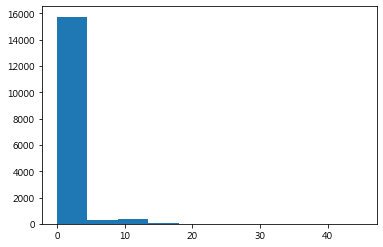

In [143]:
plt.hist(practice_df_again['이자연체회차'], bins=10)

# 0이 조금 존재한다. 이렇게 0값이 존재하는 것들이 몇 몇 건 된다.

# min() = 0 인 피처에 대해 0값의 건수 / 전체 데이터 건수 대비 몇 퍼센트 비율로 존재하는 지 확인

In [142]:
zero_features = ['과목명', '상품명', '성별구분' , '나이', '계약기간월', '정상이율', '상환방법', '이자진행회차', '이자연체회차', '원금연체회차', '상품분류', '실행금액', '대출잔액', '연체이율' ,'정상이자', '신용등급'] # 0 값을 검사할 피처 명 리스트
total_count = practice_df_again['과목명'].count() # 전체 데이터 건수

# 아래는, 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트를 계산한다.
for feature in zero_features:
    zero_count = practice_df_again[practice_df_again[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}개, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

과목명 0 건수는 33개, 퍼센트는 0.20 %
상품명 0 건수는 15개, 퍼센트는 0.09 %
성별구분 0 건수는 8396개, 퍼센트는 50.83 %
나이 0 건수는 0개, 퍼센트는 0.00 %
계약기간월 0 건수는 4개, 퍼센트는 0.02 %
정상이율 0 건수는 0개, 퍼센트는 0.00 %
상환방법 0 건수는 1개, 퍼센트는 0.01 %
이자진행회차 0 건수는 48개, 퍼센트는 0.29 %
이자연체회차 0 건수는 15205개, 퍼센트는 92.05 %
원금연체회차 0 건수는 15968개, 퍼센트는 96.67 %
상품분류 0 건수는 13개, 퍼센트는 0.08 %
실행금액 0 건수는 211개, 퍼센트는 1.28 %
대출잔액 0 건수는 37개, 퍼센트는 0.22 %
연체이율 0 건수는 0개, 퍼센트는 0.00 %
정상이자 0 건수는 1624개, 퍼센트는 9.83 %
신용등급 0 건수는 0개, 퍼센트는 0.00 %


In [144]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = practice_df_again[zero_features].mean()
practice_df_again[zero_features] = practice_df_again[zero_features].replace(0, mean_zero_features)

# 기본 DB 자체를 바꿔버린다. 

In [145]:
practice_df_again.describe()

,과목명,상품명,성별구분,나이,계약기간월,정상이율,상환방법,이자진행회차,이자연체회차,원금연체회차,상품분류,실행금액,대출잔액,연체이율,정상이자,신용등급
count,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000,16518.000000
mean,1.002908,3.288490,0.741637,26.855854,53.485161,23.826376,1.702791,26.780223,0.997229,0.458278,3.310328,325.394985,4047.778549,25.350986,4339.454208,5.080034
std,0.053830,0.707919,0.254120,6.543430,13.906661,4.404357,0.457029,15.151589,2.124280,1.824519,0.755697,154.864468,2268.728065,3.861908,2410.334034,0.947051
min,1.000000,1.000000,0.491706,19.000000,1.000000,2.000000,1.000000,1.000000,0.519252,0.233019,1.000000,1.000000,1.000000,4.300000,1.000000,1.000000
25%,1.000000,3.000000,0.491706,23.000000,60.000000,19.900000,1.000000,18.000000,0.519252,0.233019,3.000000,255.000000,1920.000000,22.900000,2327.000000,5.000000
50%,1.000000,3.000000,0.491706,25.000000,60.000000,24.000000,2.000000,26.000000,0.519252,0.233019,3.000000,430.000000,4348.000000,27.000000,3951.003451,5.000000
75%,1.000000,3.000000,1.000000,28.000000,60.000000,27.600000,2.000000,38.000000,0.519252,0.233019,3.000000,430.000000,5699.750000,27.900000,6444.750000,6.000000
max,2.000000,7.000000,1.000000,89.000000,120.000000,29.000000,2.000000,115.000000,45.000000,82.000000,11.000000,511.000000,7822.000000,32.000000,8488.000000,10.000000


In [152]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.

##### 바뀐 DB를 기반으로 다시 값들 추출

X = practice_df_again[:]
y = practice_df.iloc[:, -1] # 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해  Outcome 값만 추출 (피처데이터세트)

scaler = StandardScaler()   # StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
X_scaled = scaler.fit_transform(X) # StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.

#print(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[2879  203]
 [ 206   16]]
정확도: 0.8762, 정밀도: 0.0731, 재현율: 0.0721, F1: 0.0726, ROC AUC: 0.5031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [161]:
print(y)

0        0
1        0
2        0
3        1
4        1
        ..
16513    0
16514    0
16515    0
16516    0
16517    0
Name: 기한이익상실여부01, Length: 16518, dtype: int64


In [154]:
from sklearn.preprocessing import Binarizer

thresholds = [0.10, 0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5, 0.80, 0.90]
pred_proba = lr_clf.predict_proba(X_test)

def get_clf_eval2(y_test, pred):
    accuracy = accuracy_score(y_test,pred)  # 정확도
    precision = precision_score(y_test,pred) # 정밀도
    recall = recall_score(y_test,pred) # 재현율
    f1 = f1_score(y_test, pred)    # F1 스코어 추가
    roc_score = roc_auc_score(y_test, pred)  # ROC AUC 값 추가
    # 모든 Score 출력
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):   # pred_proba_c1 새로이 추가
    # thresholds list객체 내의 값을 차례로 iteration(반복)하면서 Evauation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)  # fit으로 x_test 값에 해당하는 pred_proba_c1 사용
        custom_predict1 = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval2(y_test, custom_predict1)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.1
정확도: 0.9967, 정밀도: 0.9648, 재현율: 0.9865, F1: 0.9755, ROC AUC: 0.9919
임곗값: 0.3
정확도: 0.9982, 정밀도: 0.9865, 재현율: 0.9865, F1: 0.9865, ROC AUC: 0.9928
임곗값: 0.33
정확도: 0.9982, 정밀도: 0.9865, 재현율: 0.9865, F1: 0.9865, ROC AUC: 0.9928
임곗값: 0.36
정확도: 0.9982, 정밀도: 0.9865, 재현율: 0.9865, F1: 0.9865, ROC AUC: 0.9928
임곗값: 0.39
정확도: 0.9982, 정밀도: 0.9865, 재현율: 0.9865, F1: 0.9865, ROC AUC: 0.9928
임곗값: 0.42
정확도: 0.9982, 정밀도: 0.9865, 재현율: 0.9865, F1: 0.9865, ROC AUC: 0.9928
임곗값: 0.45
정확도: 0.9979, 정밀도: 0.9864, 재현율: 0.9820, F1: 0.9842, ROC AUC: 0.9905
임곗값: 0.48
정확도: 0.9979, 정밀도: 0.9864, 재현율: 0.9820, F1: 0.9842, ROC AUC: 0.9905
임곗값: 0.5
정확도: 0.9979, 정밀도: 0.9864, 재현율: 0.9820, F1: 0.9842, ROC AUC: 0.9905
임곗값: 0.8
정확도: 0.9961, 정밀도: 0.9860, 재현율: 0.9550, F1: 0.9703, ROC AUC: 0.9770
임곗값: 0.9
정확도: 0.9958, 정밀도: 0.9860, 재현율: 0.9505, F1: 0.9679, ROC AUC: 0.9747


In [155]:
binarizer = Binarizer(threshold=0.30) # 임곗값을 0.48로 설정한 Binarizer 생성

# 위에서 추출한 pred_proba = lr_clf.predict_proba(X_test) 결과에서 이진 분류 중 두번째에 해당하는 array에서 1에 해당하는 칼럼값을 변환

pred_th_030 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_030)

print( pred_proba[:,1].reshape(-1,1) )  # reshape는 일렬로 세우는 것



정확도: 0.9982, 정밀도: 0.9865, 재현율: 0.9865, F1: 0.9865, ROC AUC: 0.9928
[[0.00110992]
 [0.00878181]
 [0.00198985]
 ...
 [0.00108227]
 [0.00099837]
 [0.00433275]]


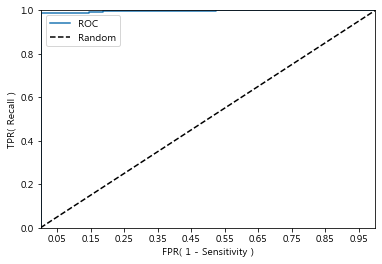

In [156]:
# FPR, TPR 임곗값 시각화
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [160]:
get_clf_eval2(y_test, pred)
get_clf_eval2(y_test, lr_pred)

정확도: 0.9979, 정밀도: 0.9864, 재현율: 0.9820, F1: 0.9842, ROC AUC: 0.9905
정확도: 0.8762, 정밀도: 0.0731, 재현율: 0.0721, F1: 0.0726, ROC AUC: 0.5031


# 교차검증 -> 결정트리모델 평가. K-Fold, cross_val_score, GridSearchCV 사용 하이퍼파라미터 튜닝 후 결정트리에 테스트

In [61]:
############################################# 정말 어려운 구현 #############################################


from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체 생성
    kfold = KFold(n_splits = folds)
    scores = [] # 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    
    
    # K-Fold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_practice_df)):
        # X_practice_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_practice_df.values[train_index], X_practice_df.values[test_index]
        y_train, y_test = y_practice_df.values[train_index], y_practice_df.values[test_index]
        
        # Classifier 학습/예측/정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
        
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

############################################# 정말 어려운 구현 #############################################

교차 검증 0 정확도: 0.9970
교차 검증 1 정확도: 0.9970
교차 검증 2 정확도: 0.9988
교차 검증 3 정확도: 0.9906
교차 검증 4 정확도: 0.9946
평균 정확도: 0.9956


In [62]:
# 교차 검증을 위한 cross_val_score() API 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_practice_df, y_practice_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

# 정확도가 다른 이유는. cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문.

교차 검증 0 정확도: 0.9970
교차 검증 1 정확도: 0.9970
교차 검증 2 정확도: 0.9867
교차 검증 3 정확도: 0.9955
교차 검증 4 정확도: 0.9903
평균 정확도: 0.9933


In [63]:
# GridSearchCV로 결정트리분류의 최적 하이퍼 파라미터 찾고 예측 성능 측정.

# 단계1. CV에 5개 폴드세트 지정
# 단계2. max_depth, min_samples_split, min_samples_leaf 하이퍼 파라미터를 변경하면서 성능 측정
# 단계3. 최적 하이퍼 파라미터와 그때의 예측을 출력
# 단계4. 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측 수행.

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_


# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


# 하이퍼 파라미터 변경 전보다 약 8% 이상 증가했는데, 일반적으로 하이퍼 파라미터 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다.
# -> 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보일 뿐이다.

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9974
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9982


# 아래는 결정트리 시각화 구현하다 만 것

dTreeLimit = DecisionTreeClassifier(max_depth=3, random_state=0)

dTreeLimit.fit(X_train, y_train)

print("Train Set Score2 : {:2f}".format(dTreeLimit.score(X_train, y_train)))
print("Test Set Score2 : {:2f}".format(dTreeLimit.score(X_test, y_test)))

import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dTreeLimit, out_file='tree.dot',
                class_names=practice_df3_names,
                feature_names=practice_df3_names,
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게



with open('tree.dot') as file_reader:
    dot_graph = file_reader.read()


dot = graphviz.Source(dot_graph) # dot_graph의 source 저장
dot.render(filename='tree.png') # png로 저장



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_practice_df3, y_practice_df3, test_size=0.2, random_state=13) # test 데이터가 20%

from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names= practice_df3.target_names,feature_names = practice_df3.feature_names, impurity=True, filled=True)

#### from sklearn.tree import export_graphviz

export_graphviz(
        dt_clf,
        out_file=image_path('adklsfja.dot'),
        feature_names=['과목명','상품명', '성별구분','생일/사업자','담보명','상환방법','자금용도구분코드','보정이자구분','기한이익상실여부'],
        class_names=y_practice_df3_names,
        rounded = True,
        filled = True)

